## Loading in Data

In [36]:
import pandas as pd
import numpy as np

import tensorflow as tf
import os

import matplotlib.pyplot as plt

Loading Images

In [37]:
data = tf.keras.utils.image_dataset_from_directory(r"D:\Python Project\Image Classification\Pneumonia\chest_xray\chest_xray\data")

Found 5856 files belonging to 2 classes.


In [38]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

In [39]:
#Images as an array

batch[0].shape

(32, 256, 256, 3)

In [40]:
#Image Labels
batch[1]

array([1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1])

From here we have loaded our images and see that normal conditions = 0, and pneumonia conditions are coded as 1

## Preprocessing Data

#### Scaling Data between 0 and 1

In [41]:
data = data.map(lambda x,y: (x/255, y))

In [42]:
batch = data.as_numpy_iterator().next()

In [43]:
batch[0].max()

1.0

In [44]:
batch[0].min()

0.0

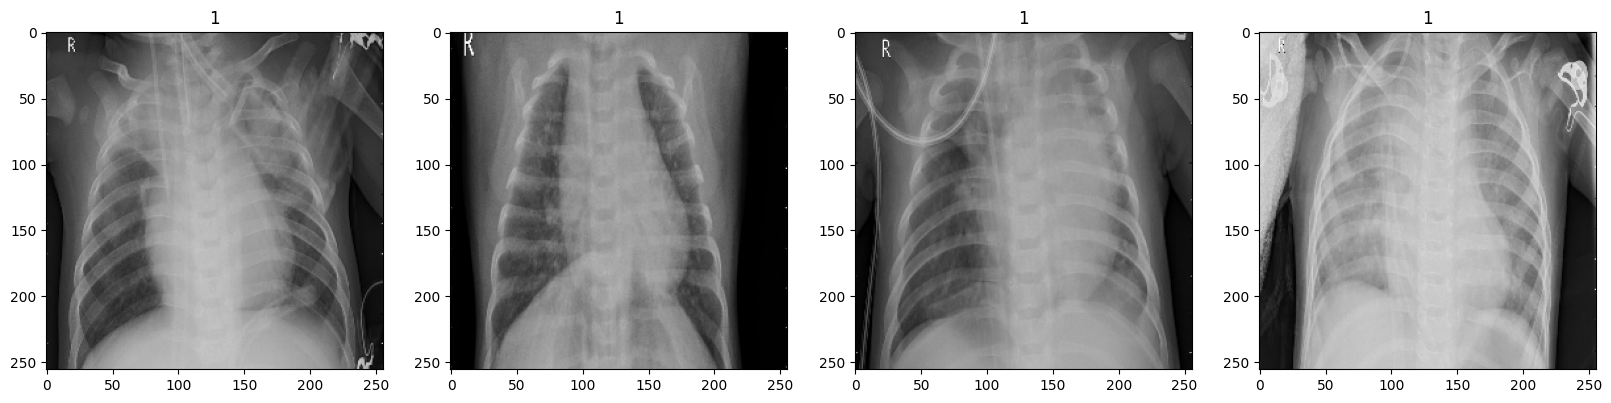

In [45]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

### Splitting Data into Training and Testing Split

In [46]:
#Calculating Batch Count
len(data)

183

In [47]:
#Shuffling Data
#data = data.shuffle(buffer_size=1000)

In [48]:
#Creating Splits
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [49]:
train_size + val_size + test_size

182

In [50]:
#Allocating Batches
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [51]:
len(train) + len(val) + len(test)

182

### Building Convulution Neural Network

In [60]:
#Imports
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [61]:
model = Sequential()

In [63]:
model = Sequential([
    Conv2D(16, (3, 3), activation="relu", input_shape=(256, 256, 3)),
    MaxPooling2D(),
    Dropout(0.2),
    
    Conv2D(32, (3, 3), activation="relu"),
    MaxPooling2D(),
    Dropout(0.2),
    
    Conv2D(16, (3, 3), activation="relu"),
    MaxPooling2D(),
    Dropout(0.2),
    
    Flatten(),
    Dense(256, activation="relu"),
    Dropout(0.5),
    Dense(1, activation="sigmoid")
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [64]:

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[early_stopping])

Epoch 1/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 33s 246ms/step - accuracy: 0.7497 - loss: 0.6571 - val_accuracy: 0.9262 - val_loss: 0.2237
Epoch 2/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 31s 243ms/step - accuracy: 0.9186 - loss: 0.2124 - val_accuracy: 0.9314 - val_loss: 0.1881
Epoch 3/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 32s 245ms/step - accuracy: 0.9373 - loss: 0.1718 - val_accuracy: 0.9314 - val_loss: 0.1560
Epoch 4/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 31s 241ms/step - accuracy: 0.9304 - loss: 0.1630 - val_accuracy: 0.9427 - val_loss: 0.1423
Epoch 5/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 31s 244ms/step - accuracy: 0.9526 - loss: 0.1358 - val_accuracy: 0.9410 - val_loss: 0.1471
Epoch 6/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 31s 245ms/step - accuracy: 0.9573 - loss: 0.1192 - val_accuracy: 0.9505 - val_loss: 0.1369
Epoch 7/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 31s 241ms/step - accuracy: 0.9505 - loss: 0.1191 - val_accuracy: 0.9497 - val_loss: 0.1316
Epoch 8/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 32s 248ms/step - accuracy: 0.9521 - loss: 0

### Training Model

In [65]:
hist.history

{'accuracy': [0.826171875,
  0.92724609375,
  0.938720703125,
  0.938720703125,
  0.9521484375,
  0.955810546875,
  0.95458984375,
  0.955810546875,
  0.96533203125,
  0.968994140625,
  0.963134765625,
  0.9697265625,
  0.9716796875,
  0.97314453125,
  0.9794921875,
  0.98095703125,
  0.98291015625,
  0.9814453125],
 'loss': [0.41794317960739136,
  0.20460255444049835,
  0.16754214465618134,
  0.16073104739189148,
  0.13702549040317535,
  0.12224195897579193,
  0.11496853828430176,
  0.10734379291534424,
  0.09618845582008362,
  0.08417902141809464,
  0.0969453975558281,
  0.07472880929708481,
  0.07125157117843628,
  0.07000049948692322,
  0.05640028789639473,
  0.047962963581085205,
  0.04381077364087105,
  0.0428992435336113],
 'val_accuracy': [0.9262152910232544,
  0.9314236044883728,
  0.9314236044883728,
  0.9427083134651184,
  0.9409722089767456,
  0.9505208134651184,
  0.9496527910232544,
  0.9470486044883728,
  0.9461805820465088,
  0.9453125,
  0.9513888955116272,
  0.9479166

#### Plotting Results over time

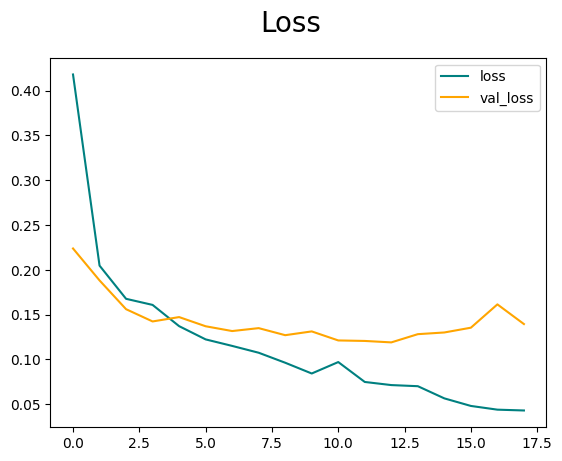

In [66]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle('Loss', fontsize =20)
plt.legend()
plt.show()

### Performance on Test Set

In [74]:
re = tf.keras.metrics.Recall()
pre = tf.keras.metrics.Precision()
acc = tf.keras.metrics.BinaryAccuracy()

In [75]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


In [76]:
print(f'''Precision: {pre.result().numpy()}, 
      Recall:{re.result().numpy()},
              Accuracy: {acc.result().numpy()}''')

Precision: 0.9743589758872986, 
      Recall:0.9743589758872986,
              Accuracy: 0.9618055820465088


In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models', 'pneumonia.h5'))